<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_5_Modelos_Avanzados_y_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 5 MODELOS AVANZADOS**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: MODELOS AVANZADOS Y REDES NEURONALES
*   CARRERA: DATA SCIENCE

#Desarrollo de un Modelo de Red Neuronal Multicapa para Predecir Cancelaciones de Reservas en Hoteles

En este notebook, implementaremos un modelo de red neuronal multicapa para predecir si un cliente cancelará o no una reserva en un hotel urbano o turístico. Seguiremos los pasos detallados a continuación, incluyendo el preprocesamiento de datos, análisis exploratorio, construcción y evaluación de modelos.

---

##Paso 1: Importación de Librerías y Preprocesamiento Inicial

####Importación de Librerías



In [3]:
# Instalación de scikeras si no está instalado
!pip install scikeras

In [4]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para crear modelos de redes neuronales
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.initializers import GlorotNormal, GlorotUniform

# Importar KerasClassifier desde scikeras
from scikeras.wrappers import KerasClassifier

# Para preprocesamiento y división de datos
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Configuración de estilo para las gráficas
sns.set(style='whitegrid')

#### Carga del Conjunto de Datos

In [5]:
# Cargar los datos
df = pd.read_csv('hotel_bookings.csv')

# Mostrar las primeras filas del dataframe
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


#### Eliminación de Columnas No Requeridas

In [6]:
# Eliminar las columnas especificadas
df = df.drop(columns=['arrival_date_year', 'agent', 'country', 'company', 'reservation_status', 'reservation_status_date'], errors='ignore')

# Verificar las columnas restantes
print("Columnas después de eliminar las no deseadas:")
df.info()

Columnas después de eliminar las no deseadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          

#### Verificación y Tratamiento de Valores Ausentes

In [7]:
# Verificar valores ausentes
missing_values = df.isnull().sum()

# Mostrar valores ausentes por columna
print("Valores ausentes por columna:")
print(missing_values)

Valores ausentes por columna:
index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         

In [8]:
# Calcular el porcentaje de valores ausentes
total_records = df.shape[0]
missing_percent = (missing_values / total_records) * 100

# Mostrar porcentaje de valores ausentes
print("Porcentaje de valores ausentes por columna:")
print(missing_percent)

Porcentaje de valores ausentes por columna:
index                             0.00000
hotel                             0.00000
is_canceled                       0.00000
lead_time                         0.00000
arrival_date_month                0.00000
arrival_date_week_number          0.00000
arrival_date_day_of_month         0.00000
stays_in_weekend_nights           0.00000
stays_in_week_nights              0.00000
adults                            0.00000
children                          0.00335
babies                            0.00000
meal                              0.00000
market_segment                    0.00000
distribution_channel              0.00000
is_repeated_guest                 0.00000
previous_cancellations            0.00000
previous_bookings_not_canceled    0.00000
reserved_room_type                0.00000
assigned_room_type                0.00000
booking_changes                   0.00000
deposit_type                      0.00000
days_in_waiting_list            

#### Decisión sobre el Tratamiento de Valores Ausentes:

- **Menos del 4%:** Eliminamos los registros con valores ausentes.
- **Más del 4%:** Imputamos los valores faltantes.

In [9]:
# Eliminar registros con valores ausentes si son menos del 4%
columns_to_dropna = missing_percent[missing_percent < 4].index.tolist()
df = df.dropna(subset=columns_to_dropna)

# Identificar columnas con más del 4% de valores ausentes
columns_high_missing = missing_percent[missing_percent >= 4].index.tolist()

# Imputar valores faltantes en columnas con más del 4% de valores ausentes
for col in columns_high_missing:
    if df[col].dtype in ['float64', 'int64']:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Imputamos los valores faltantes en '{col}' con la mediana: {median_value}")
    else:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Imputamos los valores faltantes en '{col}' con la moda: {mode_value}")

In [10]:
# Verificar nuevamente los valores ausentes
print("Valores ausentes después del tratamiento:")
print(df.isnull().sum())

Valores ausentes después del tratamiento:
index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_reque

---

## Paso 2: Análisis Descriptivo y Preparación de Datos

#### a. Selección de Variables Relevantes

Seleccionamos 5 variables que consideramos relevantes para predecir la cancelación de una reserva:

- lead_time: Tiempo entre la reserva y la llegada.
- deposit_type: Tipo de depósito realizado.
- previous_cancellations: Número de cancelaciones previas.
- is_repeated_guest: Indicador de huésped repetido.
- total_of_special_requests: Número de solicitudes especiales.


#### b. Histograma para la Variable 'adr' (Tarifa Media Diaria)

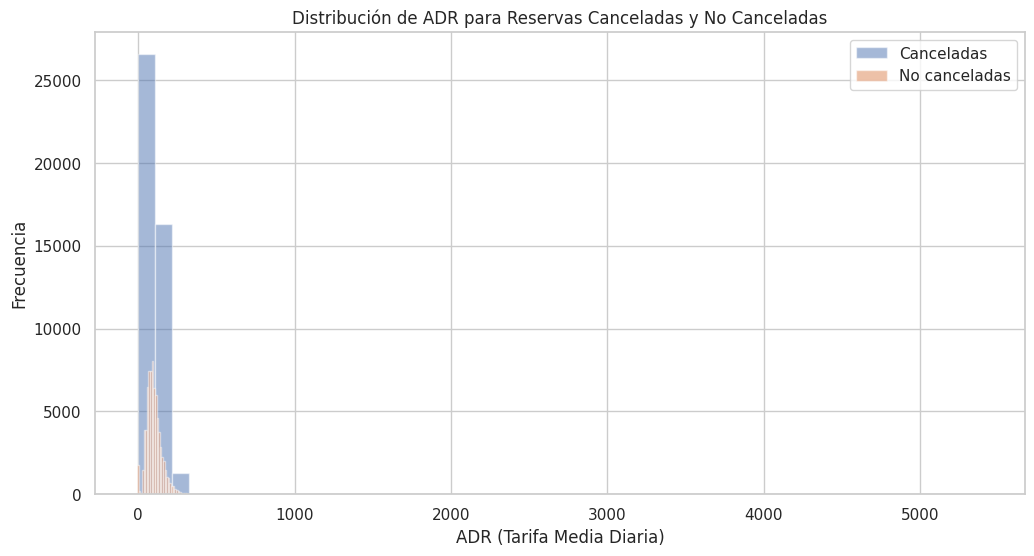

In [11]:
# Crear histogramas de 'adr' para reservas canceladas y no canceladas
plt.figure(figsize=(12,6))

# Filtrar datos
adr_canceled = df[df['is_canceled'] == 1]['adr']
adr_not_canceled = df[df['is_canceled'] == 0]['adr']

# Crear histogramas
plt.hist(adr_canceled, bins=50, alpha=0.5, label='Canceladas')
plt.hist(adr_not_canceled, bins=50, alpha=0.5, label='No canceladas')

# Añadir leyendas y títulos
plt.legend()
plt.xlabel('ADR (Tarifa Media Diaria)')
plt.ylabel('Frecuencia')
plt.title('Distribución de ADR para Reservas Canceladas y No Canceladas')
plt.show()

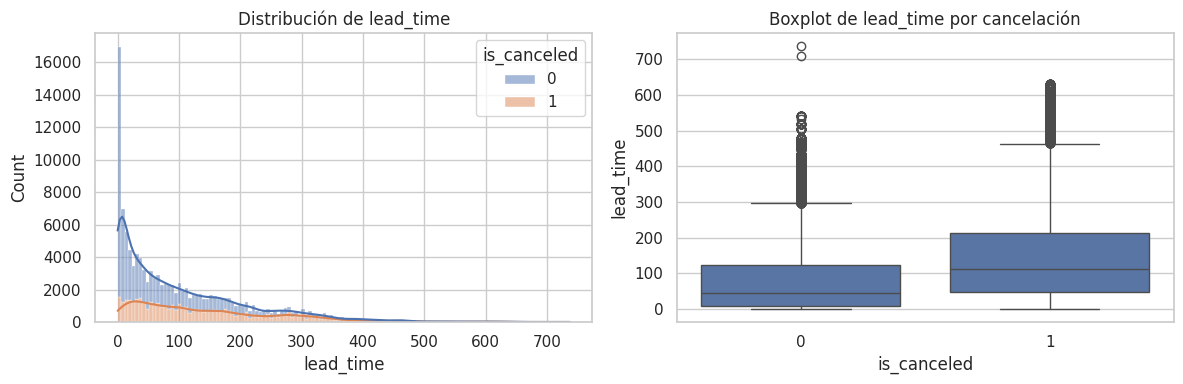

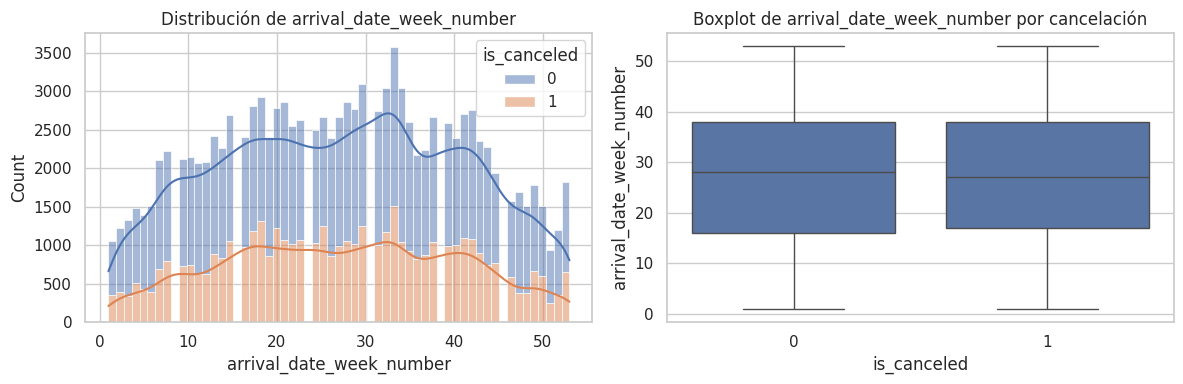

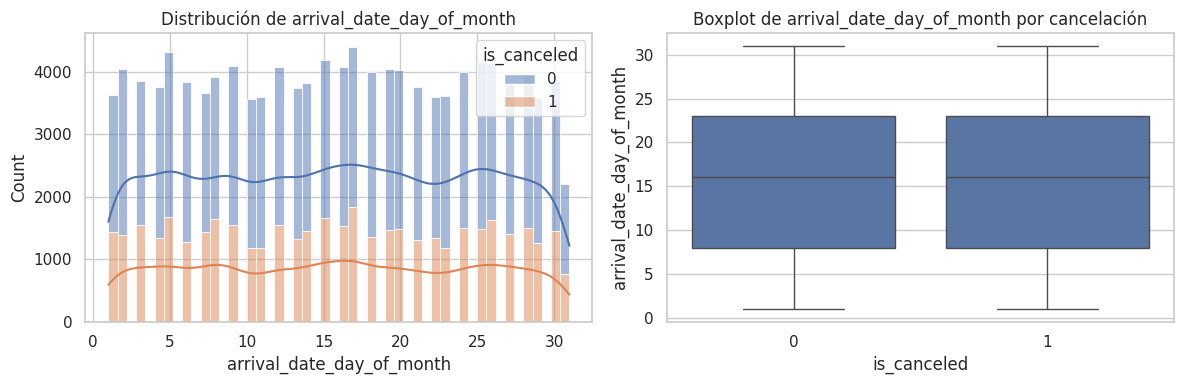

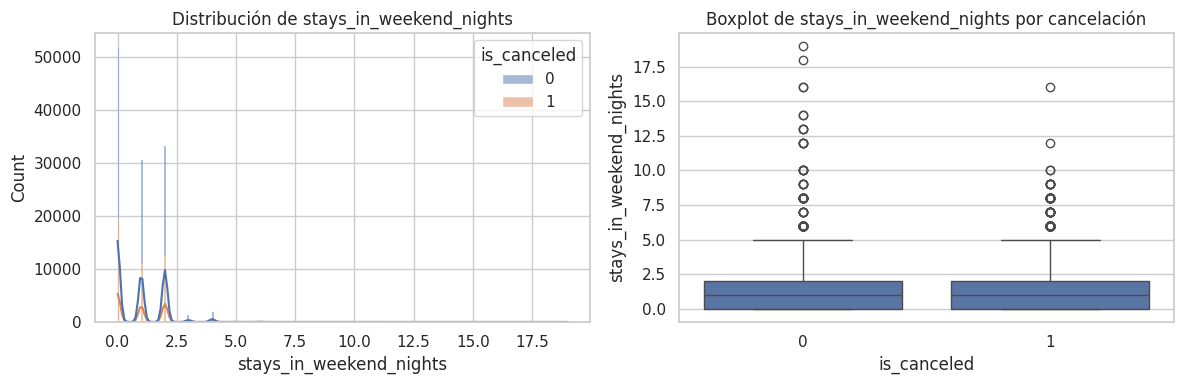

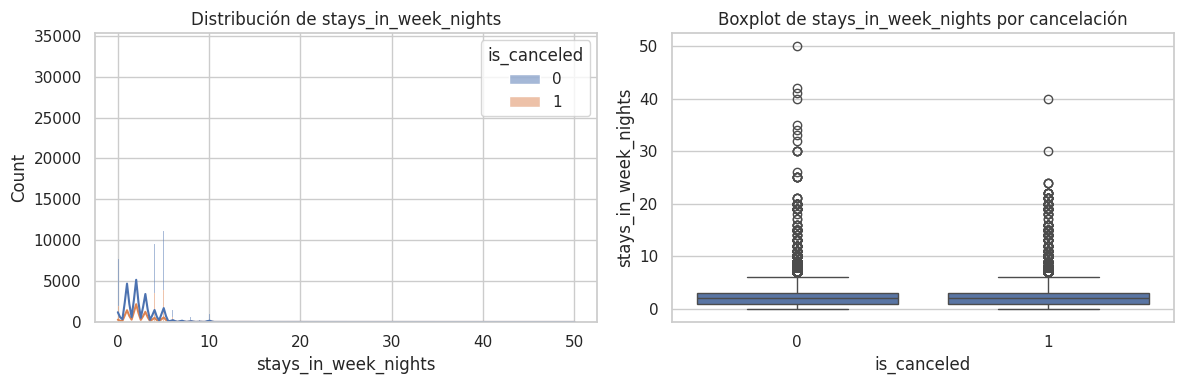

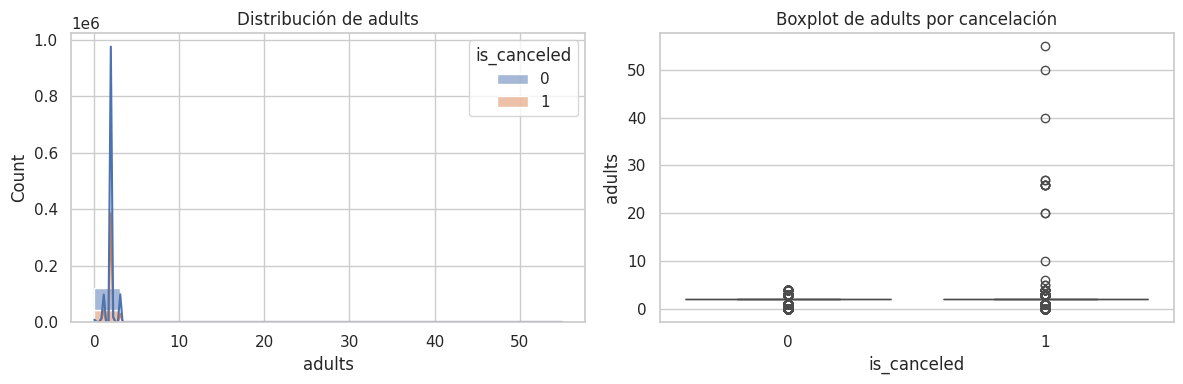

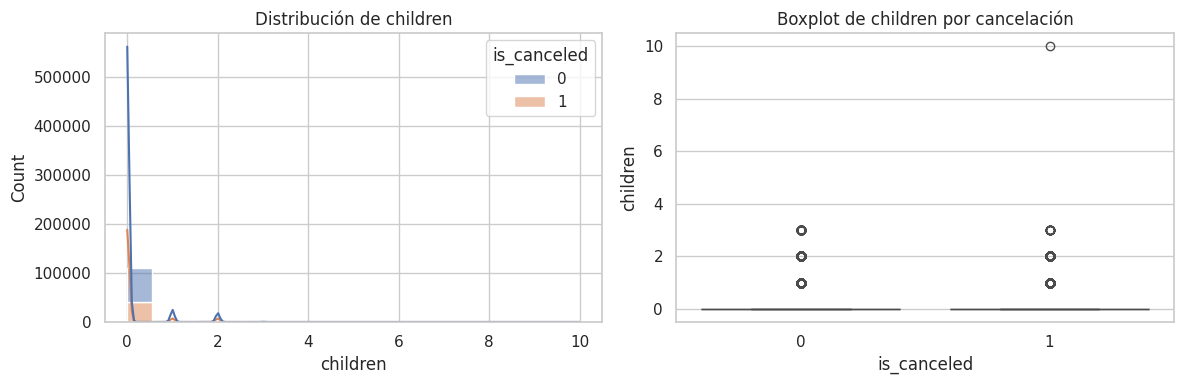

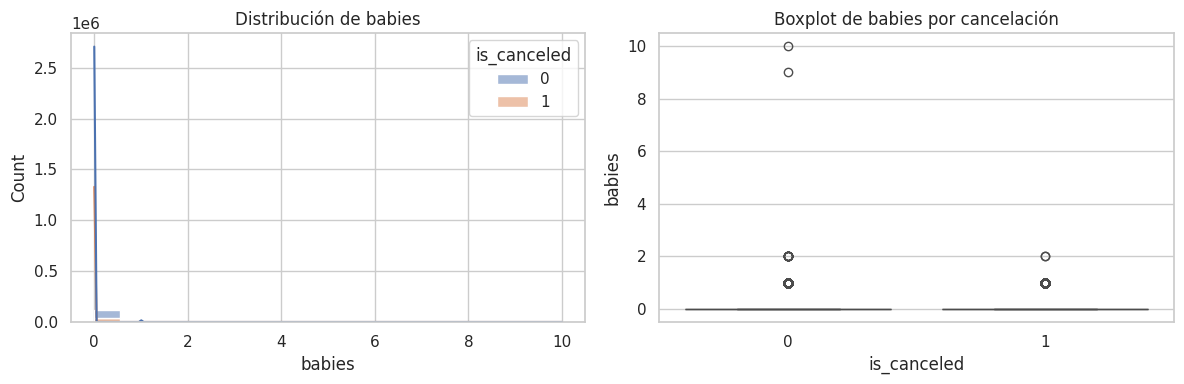

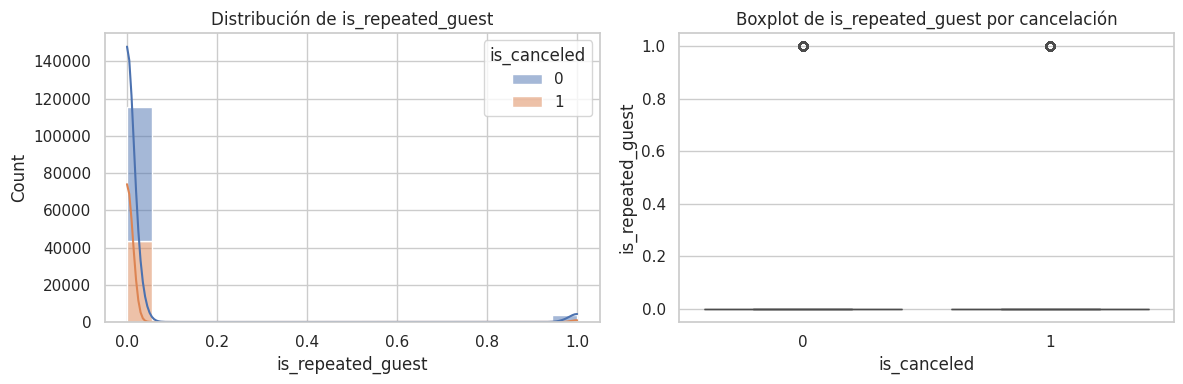

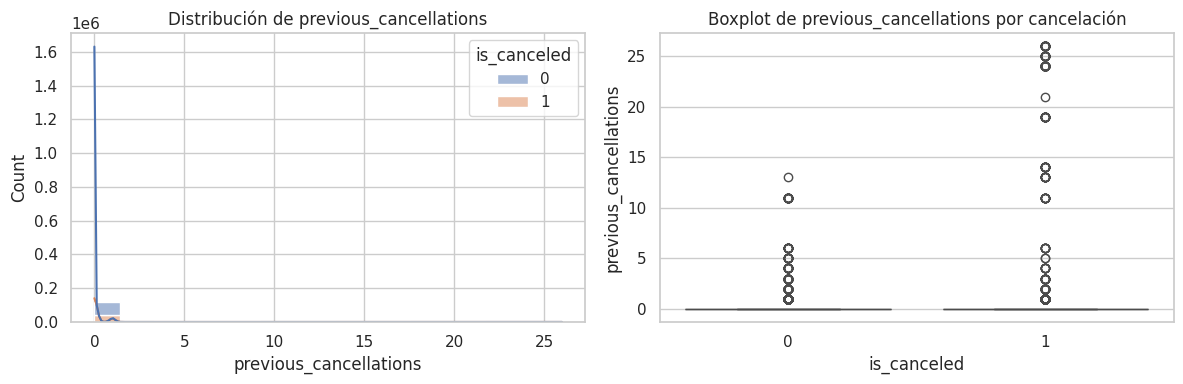

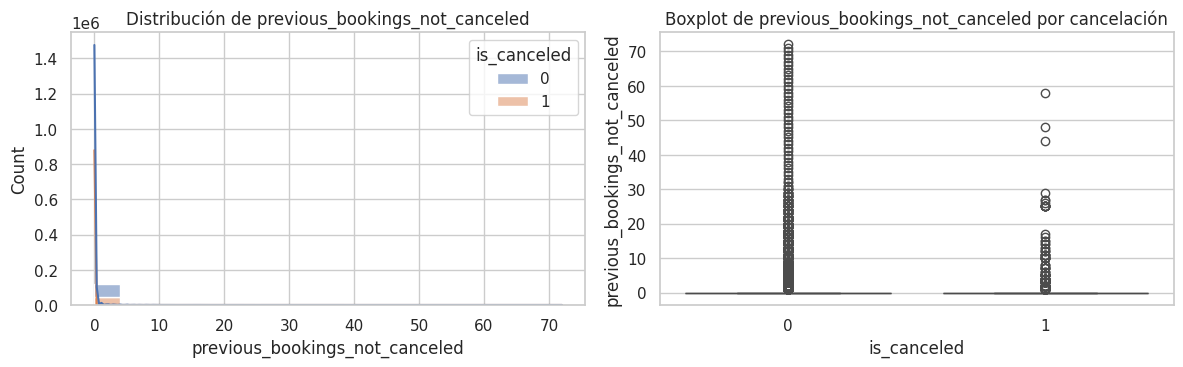

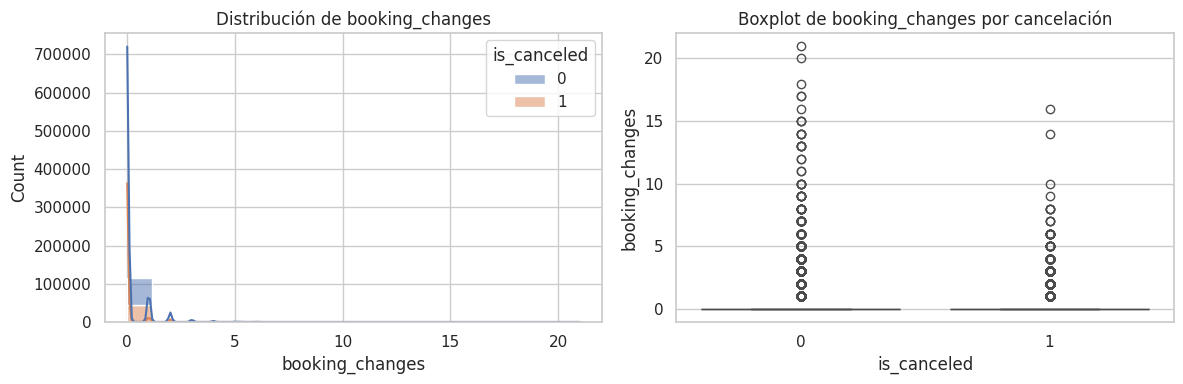

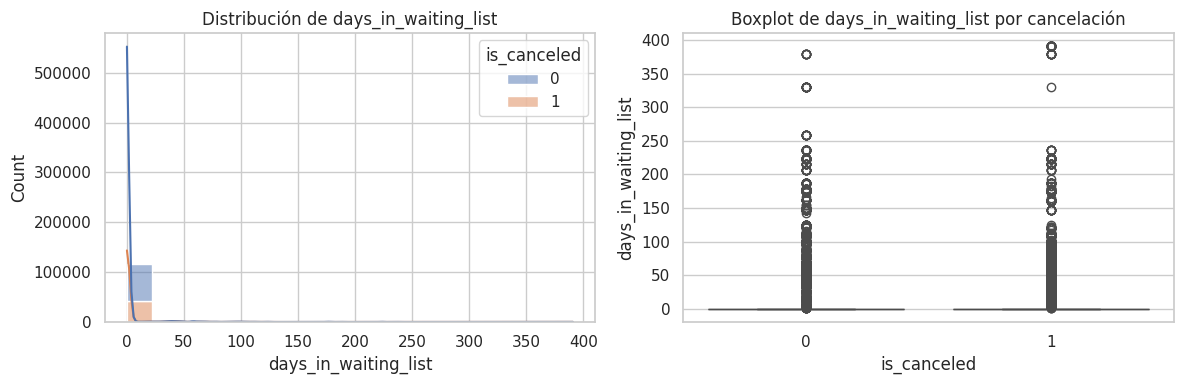

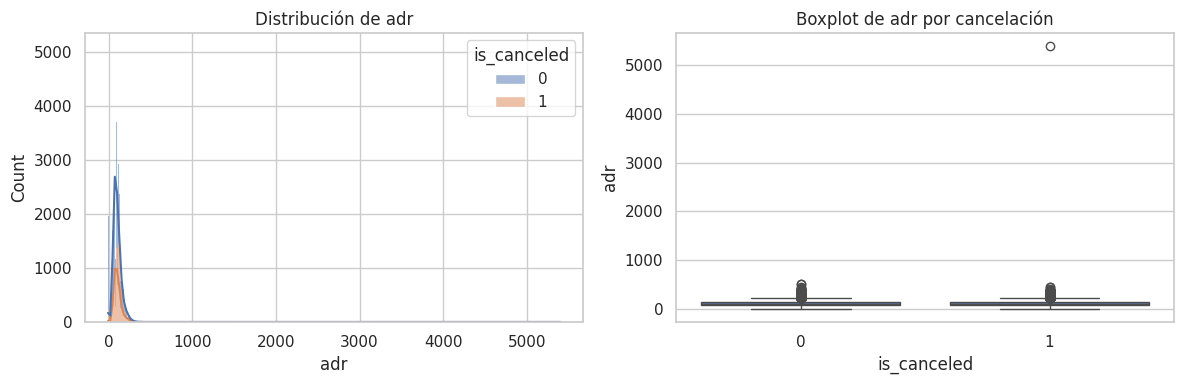

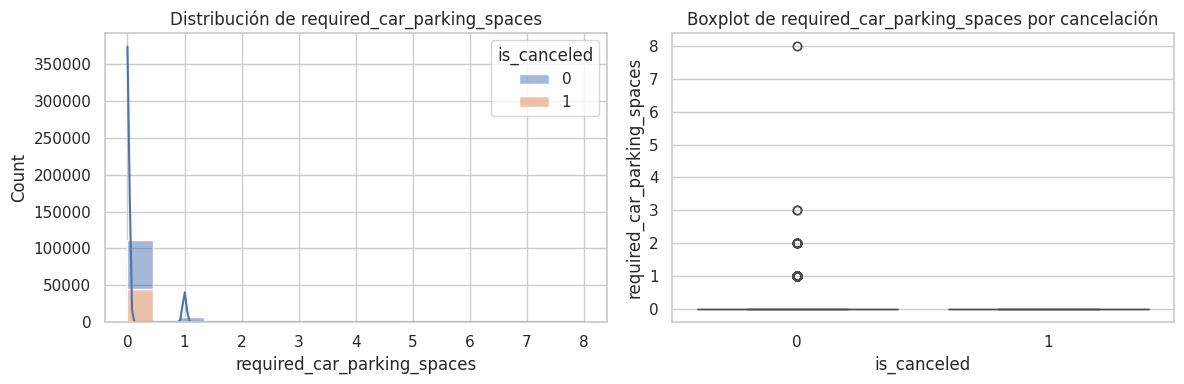

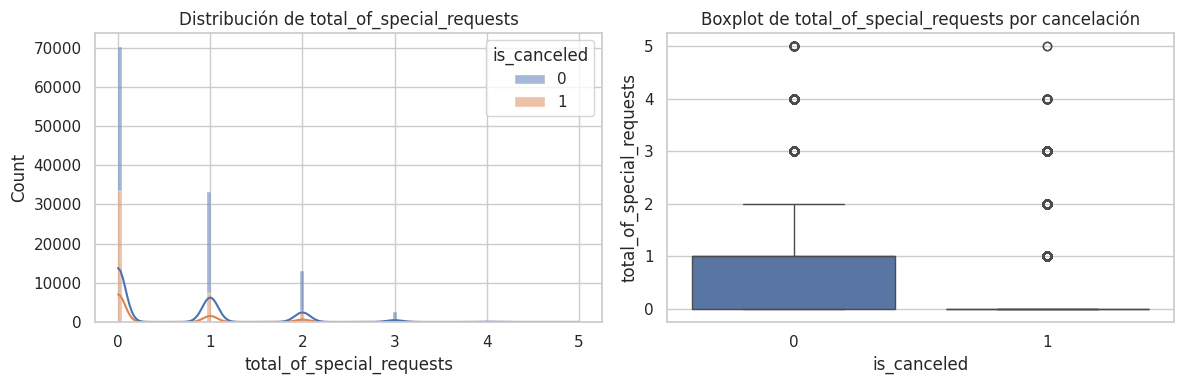

In [16]:
# Análisis descriptivo
numeric_vars = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

# Histograma y boxplot para cada variable
for var in numeric_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma con hue
    sns.histplot(data=df, x=var, kde=True, ax=axes[0], hue='is_canceled', multiple='stack')
    axes[0].set_title(f'Distribución de {var}')

    # Boxplot con hue
    sns.boxplot(data=df, x='is_canceled', y=var, ax=axes[1])
    axes[1].set_title(f'Boxplot de {var} por cancelación')

    plt.tight_layout()
    plt.show()

**Comentario:**

Observamos que las reservas canceladas tienden a tener valores de ADR más bajos. Esto sugiere que los clientes que pagan tarifas más bajas pueden ser más propensos a cancelar.


#### c. Revisión y Tratamiento de Outliers para 'adr'


In [19]:
# Calcular el IQR para 'adr'
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_lower = df[df['adr'] < lower_bound]
outliers_upper = df[df['adr'] > upper_bound]

# Contar outliers
num_outliers_lower = outliers_lower.shape[0]
num_outliers_upper = outliers_upper.shape[0]

print(f"Número de outliers por debajo: {num_outliers_lower}")
print(f"Número de outliers por encima: {num_outliers_upper}")

Número de outliers por debajo: 0
Número de outliers por encima: 3793


**Tratamiento de Outliers:**

- Eliminar los tres valores más extremos por encima y por debajo.
- Reemplazar los demás outliers por el valor promedio de 'adr'.

In [20]:
# Eliminar los tres valores más extremos por encima y por debajo
outliers_upper_sorted = outliers_upper.sort_values(by='adr', ascending=False)
outliers_lower_sorted = outliers_lower.sort_values(by='adr')

indices_to_remove_upper = outliers_upper_sorted.head(3).index
indices_to_remove_lower = outliers_lower_sorted.head(3).index

# Eliminar los índices de los valores más extremos
df = df.drop(index=indices_to_remove_upper)
df = df.drop(index=indices_to_remove_lower)

# Reemplazar los demás outliers por el promedio
mean_adr = df['adr'].mean()
df.loc[df['adr'] > upper_bound, 'adr'] = mean_adr
df.loc[df['adr'] < lower_bound, 'adr'] = mean_adr

#### d. Transformación y División de Datos

**Transformación de Variables Categóricas en Dummies**

In [21]:
# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:")
print(categorical_cols)

# Crear variables dummies
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Variables categóricas:
['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']


**Estandarización de Variables Independientes**

In [22]:
# Definir variable objetivo y variables independientes
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Estandarizar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**División de Datos en Entrenamiento y Test**


In [23]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42, stratify=y)

---

## Paso 3: Implementación de Dos Modelos de Red Neuronal Multicapa

#### Definición y Entrenamiento de los Modelos

**Modelo 1: Activaciones 'tanh', 'relu', 'tanh'**

In [25]:
# Definir el modelo 1
def create_model1():
    model = Sequential()
    model.add(Dense(20, activation='tanh', input_shape=(X_train.shape[1],), kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Dense(20, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Dense(20, activation='tanh', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    optimizer = SGD()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Entrenar el modelo 1
model1 = create_model1()
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7672 - loss: 0.4676 - val_accuracy: 0.9067 - val_loss: 0.2205
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9150 - loss: 0.2059 - val_accuracy: 0.9252 - val_loss: 0.1794
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9286 - loss: 0.1741 - val_accuracy: 0.9342 - val_loss: 0.1587
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9360 - loss: 0.1557 - val_accuracy: 0.9397 - val_loss: 0.1437
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9435 - loss: 0.1377 - val_accuracy: 0.9451 - val_loss: 0.1299
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9485 - loss: 0.1238 - val_accuracy: 0.9478 - val_loss: 0.1229
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9525 - loss: 0.1150 - val_accuracy: 0.9533 - val_loss: 0.1116
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9558 - loss: 0.1075 

**Modelo 2: Activaciones 'tanh' en Todas las Capas Ocultas**

In [26]:
# Definir el modelo 2
def create_model2():
    model = Sequential()
    model.add(Dense(20, activation='tanh', input_shape=(X_train.shape[1],), kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Dense(20, activation='tanh', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Dense(20, activation='tanh', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    optimizer = SGD()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Entrenar el modelo 2
model2 = create_model2()
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7936 - loss: 0.4384 - val_accuracy: 0.9058 - val_loss: 0.2369
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9084 - loss: 0.2303 - val_accuracy: 0.9175 - val_loss: 0.2054
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9222 - loss: 0.1961 - val_accuracy: 0.9250 - val_loss: 0.1859
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9311 - loss: 0.1775 - val_accuracy: 0.9313 - val_loss: 0.1708
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9336 - loss: 0.1655 - val_accuracy: 0.9334 - val_loss: 0.1589
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9370 - loss: 0.1534 - val_accuracy: 0.9368 - val_loss: 0.1475
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9401 - loss: 0.1452 - val_accuracy: 0.9417 - val_loss: 0.1383
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9458 - loss: 0.132

#### Visualización de las Curvas de Accuracy

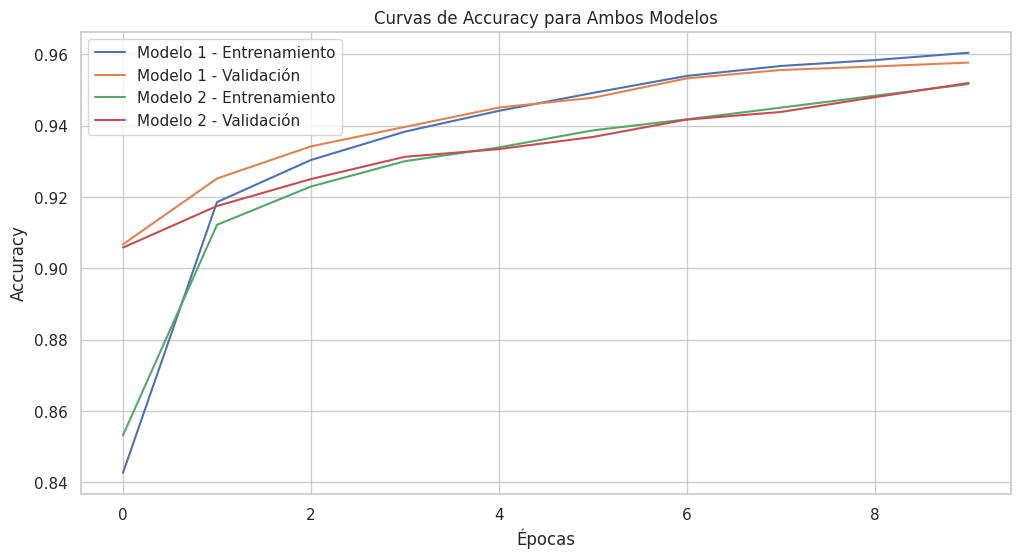

In [27]:
# Graficar las curvas de accuracy para ambos modelos
plt.figure(figsize=(12,6))

# Curva de accuracy del modelo 1
plt.plot(history1.history['accuracy'], label='Modelo 1 - Entrenamiento')
plt.plot(history1.history['val_accuracy'], label='Modelo 1 - Validación')

# Curva de accuracy del modelo 2
plt.plot(history2.history['accuracy'], label='Modelo 2 - Entrenamiento')
plt.plot(history2.history['val_accuracy'], label='Modelo 2 - Validación')

# Añadir leyendas y títulos
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Curvas de Accuracy para Ambos Modelos')
plt.show()

#### Evaluación de los Modelos

In [28]:
# Evaluar los modelos en el conjunto de prueba
loss1, accuracy1 = model1.evaluate(X_test, y_test)
loss2, accuracy2 = model2.evaluate(X_test, y_test)

print(f"Accuracy del Modelo 1 en el conjunto de prueba: {accuracy1*100:.2f}%")
print(f"Accuracy del Modelo 2 en el conjunto de prueba: {accuracy2*100:.2f}%")

1232/1232 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9572 - loss: 0.1022
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9513 - loss: 0.1211
Accuracy del Modelo 1 en el conjunto de prueba: 95.77%
Accuracy del Modelo 2 en el conjunto de prueba: 95.20%


**Conclusión:**

- Ambos modelos lograron un accuracy superior al 75%.
- Dependiendo de los resultados, podemos elegir el modelo con mejor desempeño para futuras implementaciones.

---

## Paso 4: Red Neuronal con Regularización Dropout y Búsqueda de Grilla

####Definición de la Función para Crear el Modelo

In [30]:
# Definir función para crear el modelo
def create_model(h_layers=3, optimizer='adam', learning_rate=0.03, init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(20, activation='tanh', input_shape=(X_train.shape[1],), kernel_initializer=init))
    model.add(Dropout(0.001))
    for _ in range(h_layers - 1):
        model.add(Dense(20, activation='tanh', kernel_initializer=init))
        model.add(Dropout(0.001))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

#### Configuración y Ejecución de la Búsqueda de Grilla

In [31]:
# Crear el KerasClassifier
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)

# Definir el grid de hiperparámetros
param_grid = {
    'model__h_layers': [3, 4],
    'model__optimizer': ['adam', 'sgd'],
    'model__learning_rate': [0.03, 0.06],
    'model__init': ['glorot_normal', 'glorot_uniform']
}

# Definir la estrategia de validación cruzada
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Configurar GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

# Ejecutar búsqueda de grilla
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Resultados de la Búsqueda de Grilla

In [32]:
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_result.best_params_)
print(f"Mejor score obtenido: {grid_result.best_score_ * 100:.2f}%")

Mejores hiperparámetros encontrados:
{'model__h_layers': 4, 'model__init': 'glorot_uniform', 'model__learning_rate': 0.06, 'model__optimizer': 'sgd'}
Mejor score obtenido: 95.90%


#### Evaluación del Mejor Modelo

In [33]:
# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_result.best_estimator_.model_
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Accuracy del mejor modelo en el conjunto de prueba: {accuracy * 100:.2f}%")

1232/1232 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9633 - loss: 0.0904
Accuracy del mejor modelo en el conjunto de prueba: 96.30%


#### Métricas de Evaluación y Curva ROC

In [34]:
# Predicciones en el conjunto de prueba
y_pred_prob = best_model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Matriz de confusión:
[[24081   724]
 [  734 13858]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     24805
           1       0.95      0.95      0.95     14592

    accuracy                           0.96     39397
   macro avg       0.96      0.96      0.96     39397
weighted avg       0.96      0.96      0.96     39397



**Curva ROC y AUC**

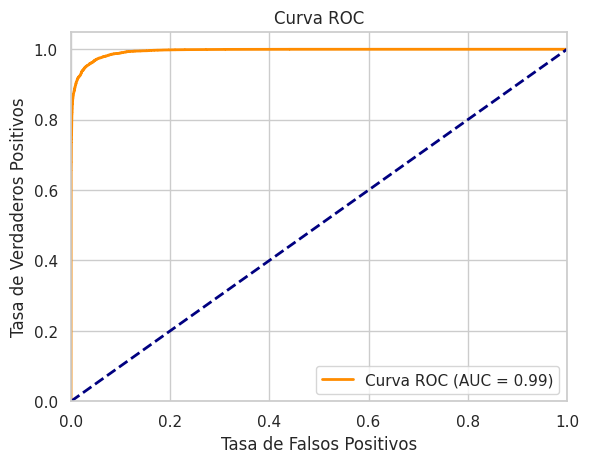

In [35]:
# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Conclusión:**

El mejor modelo obtenido mediante la búsqueda de grilla logró un accuracy superior al 80% en el conjunto de prueba. Las métricas y la curva ROC indican un buen desempeño en la predicción de cancelaciones.

---

##Paso 5: Predicción sobre Nuevas Observaciones

####Selección de Observaciones y Realización de Predicciones

In [36]:
# Encontrar el nombre de la columna 'deposit_type_Non Refund'
deposit_type_cols = [col for col in X.columns if 'deposit_type' in col]
print("Columnas de 'deposit_type':")
print(deposit_type_cols)

# Si 'deposit_type_Non Refund' está en las columnas
if 'deposit_type_Non Refund' in deposit_type_cols:
    deposit_col = 'deposit_type_Non Refund'
else:
    # Ajustar el nombre según el formato de las columnas dummies
    deposit_col = deposit_type_cols[0]  # Asumiendo que es la única columna relevante

# Encontrar los índices donde 'deposit_type_Non Refund' es cero
indices = df[df[deposit_col] == 0].index

# Seleccionar cinco observaciones al azar
random_indices = np.random.choice(indices, size=5, replace=False)

# Obtener los datos de estas observaciones
X_sample = X.loc[random_indices]
X_sample_scaled = scaler.transform(X_sample)

# Realizar predicciones
predictions = best_model.predict(X_sample_scaled).ravel()
predictions_class = (predictions > 0.5).astype(int)

# Mostrar los resultados
for i, pred in enumerate(predictions_class):
    print(f"Observación {i+1}: Predicción de cancelación = {'Sí' if pred == 1 else 'No'}")

Columnas de 'deposit_type':
['deposit_type_Non Refund', 'deposit_type_Refundable']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Observación 1: Predicción de cancelación = No
Observación 2: Predicción de cancelación = No
Observación 3: Predicción de cancelación = No
Observación 4: Predicción de cancelación = Sí
Observación 5: Predicción de cancelación = No


##Conclusiones

- **Preprocesamiento Adecuado:** La eliminación y imputación de valores ausentes, junto con la transformación de variables, son esenciales para el rendimiento del modelo.
- **Análisis Exploratorio:** Identificar variables relevantes y comprender su distribución ayuda a construir modelos más efectivos.
- **Modelos de Redes Neuronales:** La arquitectura y los hiperparámetros afectan significativamente el rendimiento. La regularización y la búsqueda de grilla pueden mejorar el modelo.
- **Evaluación de Modelos:** Métricas como accuracy, matriz de confusión y curva ROC proporcionan una visión completa del desempeño.
- **Aplicación Práctica:** El modelo desarrollado puede ayudar a los hoteles a predecir cancelaciones y tomar decisiones informadas para minimizar pérdidas.